In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from scipy.stats import norm
import math

In [283]:
#ora 

# Definisci i parametri dell'opzione e della simulazione di Monte Carlo
S0 = 100.0     # prezzo iniziale del sottostante
K = 95      # prezzo di esercizio dell'opzione
r = 0.05       # tasso di interesse senza rischio
sigma = 0.2325125 # volatilità del sottostante
T = 1.0        # tempo di maturità dell'opzione (in anni)
N = 504      # numero di passi nella simulazione di Monte Carlo
M = 5000     # numero di percorsi nella simulazione di Monte Carlo

# Calcola i parametri per il modello di Black-Scholes
dt = T / N
df = np.exp(-r * dt)

D = []
# Genera i percorsi del sottostante utilizzando una simulazione di Monte Carlo
S = np.zeros((M, N+1))
S[:,0] = S0
np.random.seed(42)
for t in range(1, N+1):
    
    
    
    eps = np.random.normal(size=M)
    S[:,t] = S[:,t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps)
    D.append(S[:,t])


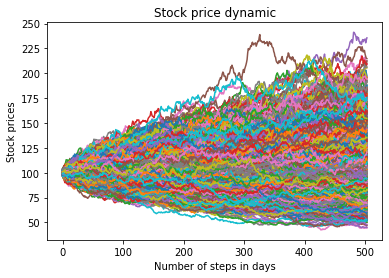

In [4]:
plt.plot(D)
plt.title("Stock price dynamic")
plt.xlabel("Number of steps in days" )
plt.ylabel("Stock prices")
plt.show()

In [60]:
print(D)

[array([100.52034984,  99.86145403, 100.67764954, ..., 103.2812606 ,
       100.84498477,  99.13002809]), array([100.08470896,  99.39813599,  98.82711861, ..., 102.53422134,
       101.3687356 ,  99.79837122]), array([ 99.38839616,  99.08864937,  98.22203572, ..., 103.94195613,
       100.44935128,  99.64408568]), array([ 99.24539467,  99.05965616,  98.29194271, ..., 104.35481634,
       102.25258889,  97.99072893]), array([ 99.60857615,  99.35528785,  97.347608  , ..., 105.41085077,
       102.91992246,  98.01101331]), array([ 99.78955967,  99.37242832,  96.91829374, ..., 104.86968944,
       100.927032  ,  97.78340589]), array([ 97.7679187 ,  98.29703412,  96.33522657, ..., 103.9860783 ,
        99.55724148,  97.11619373]), array([ 98.70240507,  99.96939891,  96.68498571, ..., 104.65692912,
       100.40533486,  97.47934508]), array([ 98.22569995, 101.0280489 ,  96.49113027, ..., 103.99943084,
       100.33203548,  96.42739203]), array([ 99.30401351, 100.21920535,  97.70168471, ..., 

In [284]:
# Calcola il prezzo dell'opzione ad ogni tempo per ogni path

K = 115
T = 2
N = 504

# Calcola il valore dell'opzione ad ogni tempo per ogni path
P = np.zeros((M, N+1))

V = []
for t in range(N, -1, -1):
    if t == N:
        # Valore dell'opzione alla maturità
        P[:,t] = np.maximum(K - S[:,t], 0)
    else:
        # Valore dell'opzione in un tempo precedente
        P[:,t] = np.maximum(K - S[:,t], 0) * df
        # Calcola il valore atteso dell'opzione al tempo successivo
        # utilizzando il modello di Black-Scholes
        d1 = (np.log(S[:,t]/K) + (r + 0.5 * sigma**2) * (T-t*dt)) / (sigma * np.sqrt(T-t*dt))
        d2 = d1 - sigma * np.sqrt(T-t*dt)
        Nd1 = norm.cdf(-d1)
        Nd2 = norm.cdf(-d2)
        E =  K * df * Nd2 - S[:,t] * Nd1 
        # Calcola il valore attuale dell'opzione come valore atteso futuro scontato
        P[:,t] = np.maximum(P[:,t], E)
        V.append(P[:,t])
# Calcola il prezzo dell'opzione ad ogni tempo per ogni path
Putprice = P



In [286]:
type(V)

list

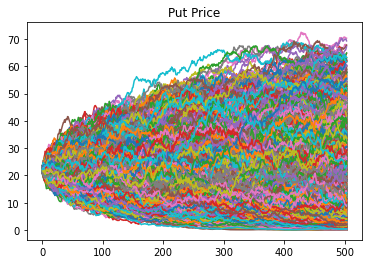

In [290]:
plt.plot(V)
plt.title('Put Price')
plt.show()

############################# PUT PRICE 



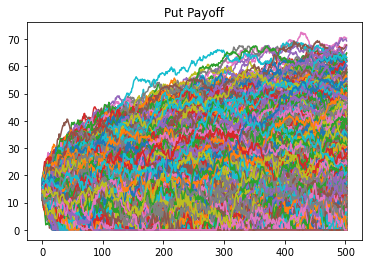

In [281]:
############à PUT PAYOFFF


Putpayoff = []
J = []
for i in range(1,504,1): 
     J = np.maximum(K - S[:,i], 0)
     Putpayoff.append(J)

plt.plot(Putpayoff)

plt.title('Put Payoff')
plt.show()

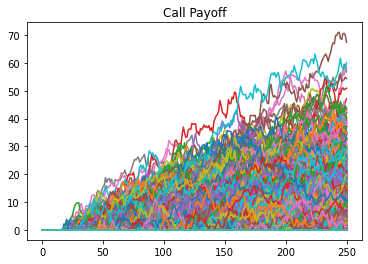

In [291]:
############ CALL PAYOFFF


Callpayoff = []
Z = []
for i in range(1,252,1): 
     Z = np.maximum(S[:,i] - k , 0)
     Callpayoff.append(Z)

plt.plot(Callpayoff)
plt.title('Call Payoff')
plt.show()

In [173]:
CallPa

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

In [90]:
N  =  252
# Calcola il valore dell'opzione ad ogni tempo per ogni path
C = np.zeros((M, N+1))

H = []
for t in range(N, -1, -1):
    if t == N:
        # Valore dell'opzione alla maturità
        C[:,t] = np.maximum(S[:,t] - K, 0)
    else:
        # Valore dell'opzione in un tempo precedente
        C[:,t] = np.maximum(S[:,t] - K, 0) * df
        # Calcola il valore atteso dell'opzione al tempo successivo
        # utilizzando il modello di Black-Scholes
        d1 = (np.log(S[:,t]/K) + (r + 0.5 * sigma**2) * (T-t*dt)) / (sigma * np.sqrt(T-t*dt))
        d2 = d1 - sigma * np.sqrt(T-t*dt)
        Nd1 = norm.cdf(d1)
        Nd2 = norm.cdf(d2)
        E = S[:,t] * Nd1 - K * df * Nd2
        # Calcola il valore attuale dell'opzione come valore atteso futuro scontato
        C[:,t] = np.maximum(C[:,t], E)
        
        H.append(C[:,t])
        



In [85]:
print(Callprice)

None


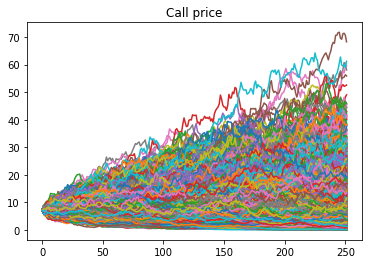

In [292]:
plt.plot(H.reverse())
# Aggiungiamo etichette e titolo

plt.title('Call price')
plt.show()



array([0.00000000e+00, 1.98412698e-03, 3.96825397e-03, ...,
       1.99404762e+00, 1.99603175e+00, 1.99801587e+00])

In [171]:
#calculate EXPECTED EXPOSURE with frequency dates

# Set up parameters for Monte Carlo simulation

#freq = 30 # frequency for calculating expected exposure in days

#t = np.arange(0, T, dt)

# Calculate exposures for each simulation at each time period
#freq_indices = np.arange(0, len(t), int(freq))
K = 95
n = 252
CallEEpath = np.maximum(S[:,0:n] - K, 0)  # EE per ogni tempo per ognmi path
CallMtm = np.array(S[:,0:n] - K)

k = 115
PutEEpath = np.maximum(k - S[:,:], 0)
PutMtm = np.array(k - S[:,:])

# Calculate expected exposure
PutEE= np.mean(PutEEpath, axis=0) # QUESTA E LA MEDIA DI TUTTI I PATH PER OGNI TIME PERIOD
CallEE= np.mean(CallEEpath, axis=0)

print(CallEE)


[ 5.          5.01568477  5.0156235   5.03712201  5.06698234  5.06444859
  5.077466    5.08982523  5.10771602  5.1495793   5.17039804  5.20798484
  5.22250452  5.27187017  5.28843259  5.3189791   5.35799605  5.3943887
  5.42985429  5.46877105  5.48087864  5.51300363  5.56577444  5.60429674
  5.64309765  5.65472732  5.69330796  5.73839372  5.77527605  5.80162727
  5.83782823  5.86131317  5.89252829  5.92057603  5.95643461  6.00055617
  6.04710304  6.05508807  6.05961554  6.09560084  6.13021127  6.14888805
  6.16980684  6.19667689  6.23448093  6.26794039  6.30630474  6.34802359
  6.3646146   6.38728746  6.41813867  6.44588288  6.47727413  6.49632541
  6.5077809   6.52620177  6.5741087   6.60616461  6.61882194  6.64523708
  6.67239469  6.68918882  6.71042907  6.70865837  6.73067203  6.77771622
  6.8113413   6.84648512  6.8458351   6.84915094  6.88510404  6.92491611
  6.9556143   6.99089945  7.01967825  7.05607628  7.09437374  7.12884536
  7.16201882  7.18553217  7.20864111  7.21372674  7.

TypeError: 'tuple' object is not callable

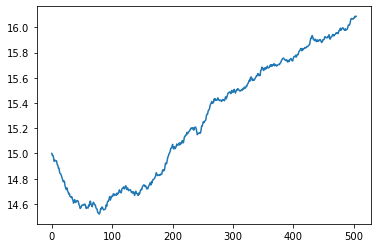

In [164]:
plt.plot(PutEE)

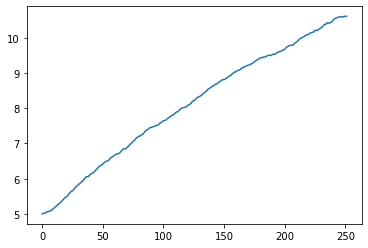

In [34]:
plt.plot(CallEE)

In [35]:
PutEE.shape


(505,)

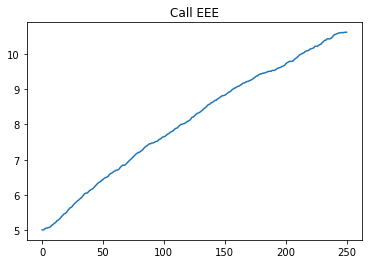

In [36]:
# EXPECTED POSITIVE EXPOSURE

CallEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = CallEE[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, CallEE.shape[0]):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, CallEE[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    CallEEE = np.append(CallEEE, max_cumulato)

# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(CallEEE)
plt.title("Call EEE")
plt.show()

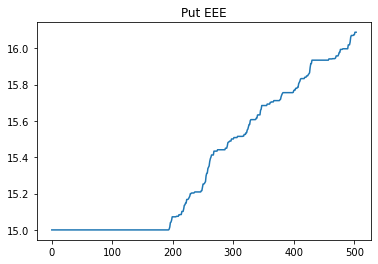

In [37]:
# EXPECTED POSITIVE EXPOSURE PUT

PutEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = PutEE[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, PutEE.shape[0]):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, PutEE[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    PutEEE = np.append(PutEEE, max_cumulato)

# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(PutEEE)
plt.title("Put EEE")
plt.show()

In [38]:
# Effective EPE CALL & PUT   media EEE

CallEEPE = np.mean(CallEEE)
print(CallEEPE)


PutEEPE = np.mean(PutEEE)
print(PutEEPE)


8.105795940045477
15.37678740619871


In [107]:
# EAD TRANSACATION LEVEL

aCEAD = 1.4 * CallEEPE
aPEAD = 1.4 * PutEEPE

print (aCEAD, aPEAD)

11.348114316063667 21.527502368678192


In [229]:
def MA(EE, EEE):
    """
    Computes the maturity adjustment as the sum of EE divided by the sum of EEE.

    Parameters:
    EE (numpy.ndarray): Array of expected exposures
    EEE (numpy.ndarray): Array of effective positive exposures

    Returns:
    float: The computed maturity adjustment
    """
    return  min(5, (1+ (EE.sum()* np.exp(-r)) / EEE.sum() * np.exp(-r) ))

In [208]:
CallEE.sum()* np.exp(-r) / CallEEE.sum() * np.exp(-r) 

0.9070323747858724

In [230]:
# Maturity adjsutment call

Mcall = MA(CallEE, CallEEE)
Mcall

1.9070323747858724

In [231]:
Mput = MA(PutEE, PutEEE)
Mput

1.899628825757838

In [212]:

# Input parameters
LGD = 0.6
R = 0.2
PD = 0.004121           # placeholder
M = 3               # placeholder
EAD = 1000000       # placeholder

x = (1 - R) ** -0.5 * norm.ppf(PD) + (R / (1 - R)) ** 0.5 * norm.ppf(0.999)
b = (0.11852-0.05478*math.log(PD))**2
K = (LGD * norm.cdf(x) - LGD * PD) * (1 - 1.5 * b) ** -1 * (1 + (M - 2.5) * b)
RWA = 12.5 * K * EAD

print("b:", b)
print("K:", K)
print("RWA:", RWA)

from scipy.stats import norm
import math as math

# Input parameters
LGD = 0.6
R = 0.14678

def RWA_calc(PD, EAD, M):
    x = (1 - R) ** -0.5 * norm.ppf(PD) + (R / (1 - R)) ** 0.5 * norm.ppf(0.999)
    b = (0.11852-0.05478*math.log(PD))**2
    K = (LGD * norm.cdf(x) - LGD * PD) * (1 - 1.5 * b) ** -1 * (1 + (M - 2.5) * b)

    RWA = 12.5 * K * EAD

    print("b:", b)
    print("K:", K)
    print("RWA:", RWA)




b: 0.17585702532327907
K: 0.06679757285954754
RWA: 834969.6607443443


In [213]:
# RWA CALL


CallRWA = RWA_calc(0.004121, aCEAD, Mcall )

b: 0.17585702532327907
K: 0.038765353745492975
RWA: 5.498920822581264


In [214]:
### RWA PUT

PutRWA = RWA_calc(0.004121, aPEAD, Mput)

b: 0.17585702532327907
K: 0.038709006854514484
RWA: 10.41635295937176


In [40]:
#################à PFE CALL

#PFE  CALL

CallPFE97 = np.percentile(CallEE, q=97.5)

CallPFE2 = np.percentile(CallEE, q=2.5)

print(CallPFE2, CallPFE97)

5.080864785004139 10.587529283520777


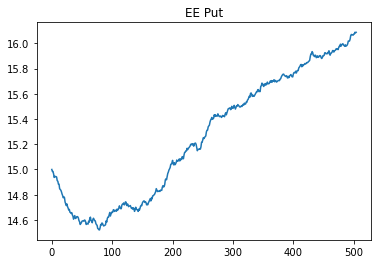

In [369]:
plt.plot(PutEE)
plt.title("EE Put")
plt.show()


In [42]:
#PFE PUT

PutPFE97 = np.percentile(PutEE, q=97.5)

PutPFE2 = np.percentile(PutEE, q=2.5)

print(PutPFE2, PutPFE97)

14.563438692244155 16.01715738321598


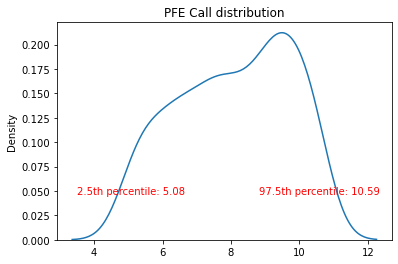

In [298]:
################### PFE PLOTTING

import seaborn as sns
import numpy as np


# Plot the kernel density estimate
sns.kdeplot(CallEE)


# Add the percentiles as text to the plot
plt.text(CallPFE2, 0.05, f'2.5th percentile: {CallPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(CallPFE97 , 0.05, f'97.5th percentile: {CallPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Call distribution")
plt.show()



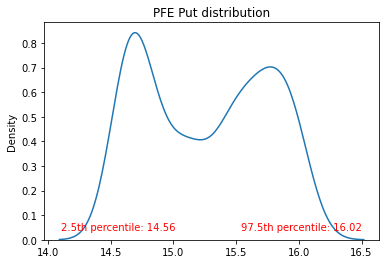

In [299]:
################### PFE PLOTTING

import seaborn as sns
import numpy as np


# Plot the kernel density estimate
sns.kdeplot(PutEE)




# Add the percentiles as text to the plot
plt.text(PutPFE2, 0.05, f'2.5th percentile: {PutPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(PutPFE97 , 0.05, f'97.5th percentile: {PutPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Put distribution")
plt.show()


# PORTFOLIO LEVEL

In [44]:
#new_shape = (5000,252)
#PutMtm = pd.DataFrame(PutMtm)
#PutMtm_test = PutMtm.iloc[:,:252]
#Nput = PutMtm.reshape(new_shape)
#Mtm1 = CallMtm + PutMtm_test
#print(Mtm)

In [217]:
import numpy as np



# riempi Cm e Pm con i dati

# crea l'array risultato con dimensioni corrette
Mtm_totale = np.zeros((5000, 504))

# somma i primi 252 elementi di Cm con i primi 252 elementi di Pm
Mtm_totale[:, :252] = CallMtm + PutMtm[:, :252]

# somma i valori dalla colonna 253 alla colonna 504 di ogni riga di Pm
Mtm_totale[:, 251:] = PutMtm[:, 252:]

# stampa l'array risultato
print(Mtm_totale)


[[ 20.          20.          20.         ... -17.04177432 -18.35753051
  -16.92367028]
 [ 20.          20.          20.         ... -10.221899   -10.14137933
  -10.77209984]
 [ 20.          20.          20.         ...  24.06966853  25.69038678
   25.53659476]
 ...
 [ 20.          20.          20.         ...   9.84033116  10.40957549
    8.94208079]
 [ 20.          20.          20.         ...  33.8021953   32.99240539
   31.80593308]
 [ 20.          20.          20.         ...  20.78578698  21.19872574
   21.0122588 ]]


In [189]:
###################### NOOOOOoooooooooo à#################

In [320]:
Putpayoff = []
J = []
for i in range(1,504,1): 
     J = np.maximum(K - S[:,i], 0)
     Putpayoff.append(J)




In [321]:
Callpayoff = []
Z = []
for i in range(1,252,1): 
     Z = np.maximum(S[:,i] - k , 0)
     Callpayoff.append(Z)


In [325]:
Callpayoff = np.array(Callpayoff)

Putpayoff = np.transpose(Putpayoff)

In [326]:
Callpayoff.shape

(5000, 251)

In [327]:
Putpayoff.shape

(5000, 503)

In [328]:
Callpayoff= np.amax(Callpayoff, axis=0)


In [330]:
Callpayoff.shape

(251,)

In [329]:
Putpayoff = np.amax(Putpayoff, axis = 0)
Putpayoff.shape

(503,)

In [335]:
Callpayoff[:4] + Putpayoff[:4]

array([18.2968303 , 20.52369333, 21.27168286, 22.98588857])

In [311]:
Callpayoff.shape

AttributeError: 'list' object has no attribute 'shape'

In [338]:
Mtm2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [359]:
# crea l'array risultato con dimensioni corrette
Mtm2 = []

# somma i primi 252 elementi di Cm con i primi 252 elementi di Pm
Mtm2[:251] = Callpayoff[:251]+ Putpayoff[:251]

# somma i valori dalla colonna 253 alla colonna 504 di ogni riga di Pm
Mtm2[251:] = Putpayoff[251:]

# stampa l'array risultato
print(Mtm2)


[18.296830296922423, 20.523693329313588, 21.27168286306859, 22.985888571797602, 25.016974859425517, 24.55550383568135, 24.90965440134501, 26.095040909812965, 26.217180073231447, 27.37844120846421, 28.391540131403318, 27.517298711667436, 27.91895943711674, 27.857595519784766, 27.84224497210984, 28.80256809158402, 29.385216027790875, 30.762431352081066, 32.26313980600797, 32.921642921312525, 34.893823008080844, 33.83637258440534, 32.7987346134007, 34.135024948250276, 34.58126182444222, 38.385740434980164, 40.956289066550795, 42.02840690603284, 44.79333521532145, 43.72400042774173, 44.27091863436425, 43.84364255871195, 45.894726979814024, 45.27765479254671, 44.80291870833416, 44.90287106427104, 47.9748999975002, 46.70152939558061, 48.28315894986474, 49.3272011094018, 50.20337166270919, 53.12732568426344, 53.120326302273014, 51.95925134121805, 50.67052061039841, 51.714717158745955, 51.14188664837198, 50.425314474624685, 51.43482655224652, 53.71536593468785, 54.33678576271758, 54.5856259364

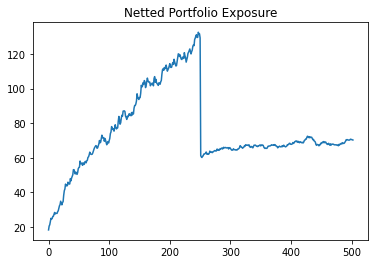

In [360]:
plt.plot(Mtm2)
plt.title("Netted Portfolio Exposure")
plt.show()

In [ ]:
########################################

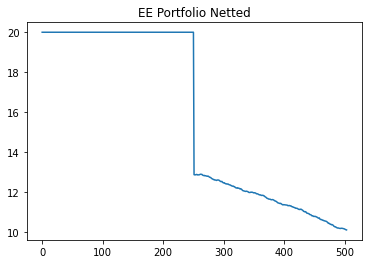

In [343]:
############## EE netted


PNettedEE= np.mean(Mtm2)

plt.plot(NettedEE)

plt.title("EE Portfolio Netted")

plt.show()

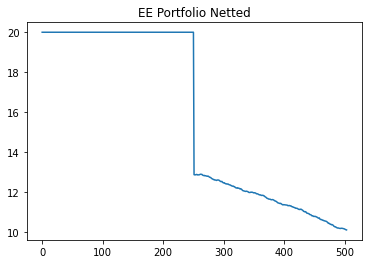

In [302]:
############## EE netted


NettedEE= np.mean(Mtm_totale, axis=0)

plt.plot(NettedEE)

plt.title("EE Portfolio Netted")

plt.show()

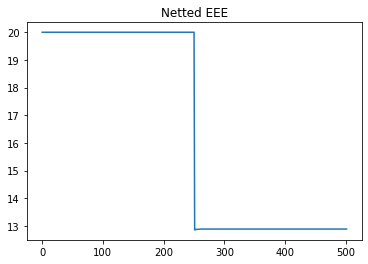

In [222]:

NettedEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = NettedEE[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, 252):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, NettedEE[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    NettedEEE = np.append(NettedEEE, max_cumulato)

max_cumulato = NettedEE[253]
    
for i in range(253, 504):
     max_cumulato = np.maximum(max_cumulato, NettedEE[i])
     # aggiungiamo il massimo cumulato alla fine dell'array EEE
     NettedEEE = np.append(NettedEEE, max_cumulato)
    
# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(NettedEEE)
plt.title("Netted EEE")
plt.show()

In [362]:
Mtm2 = np.array(Mtm2) 

In [237]:
##################### EEPE

NettedEEPE = np.mean(NettedEEE)
print(NettedEEPE)

# as we can see the EEPE for the netted portfolio is smaller than the sum of the EEPE of each trade


16.441917521783736


In [238]:
aNCEAD = 1.4 * NettedEEPE

print (aNCEAD)

23.01868453049723


In [219]:
#PFE PUT

NettedPFE97 = np.percentile(NettedEE, q=97.5)

NettedPFE2 = np.percentile(NettedEE, q=2.5)

print(NettedPFE2,NettedPFE97)

10.182001146216354 20.0


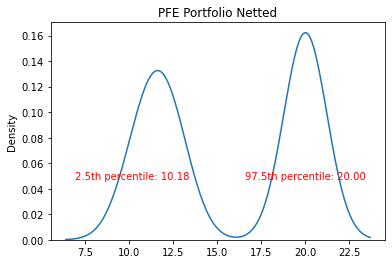

In [301]:
################### PFE PLOTTING

import seaborn as sns
import numpy as np


# Plot the kernel density estimate
sns.kdeplot(NettedEE)


# Add the percentiles as text to the plot
plt.text(NettedPFE2, 0.05, f'2.5th percentile: {NettedPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(NettedPFE97 , 0.05, f'97.5th percentile: {NettedPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Portfolio Netted")
plt.show()



In [365]:
NettedPFE97 = np.percentile(Mtm2, q=97.5)

NettedPFE2 = np.percentile(Mtm2, q=2.5)

print(NettedPFE2,NettedPFE97)

27.891345674317353 123.64891137117897


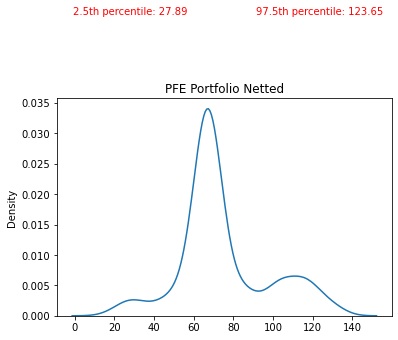

In [368]:
################### PFE PLOTTING

import seaborn as sns
import numpy as np


# Plot the kernel density estimate
sns.kdeplot(Mtm2)


# Add the percentiles as text to the plot
plt.text(NettedPFE2, 0.05, f'2.5th percentile: {NettedPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(NettedPFE97 , 0.05, f'97.5th percentile: {NettedPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Portfolio Netted")
plt.show()

In [232]:
MN = MA(NettedEE,NettedEEE)

In [239]:
NettedRWA = RWA_calc(0.004121, aNCEAD, MN)

b: 0.17585702532327907
K: 0.03849753523856812
RWA: 11.07703273572875
